<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/NAIVEBAYE'S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# change the working directory of your code on google drive
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt


In [0]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black',
                linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [0]:
input_file = 'data_multivar.txt'

X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1]) 

X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

(400, 2) (400,)


Accuracy of the classifier = 99.5 %


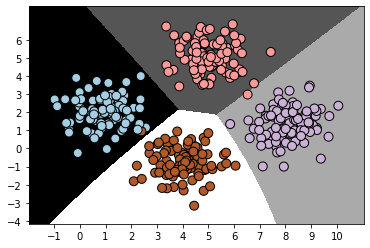

In [0]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

# compute accuracy of the classifier
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

plot_classifier(classifier_gaussiannb, X, y)

Accuracy of the classifier = 98.0 %


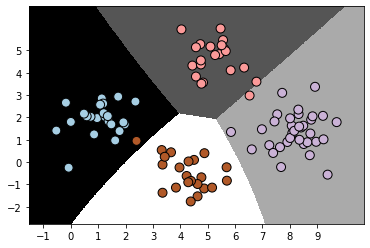

In [0]:
###############################################
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

y_test_pred = classifier_gaussiannb_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

plot_classifier(classifier_gaussiannb_new, X_test, y_test)

In [0]:
###############################################
# Cross validation and scoring functions

num_validations = 20
accuracy =cross_val_score(classifier_gaussiannb, 
        X, y, scoring='accuracy', cv=num_validations)
print ("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

f1 = cross_val_score(classifier_gaussiannb, 
        X, y, scoring='f1_weighted', cv=num_validations)
print ("F1: " + str(round(100*f1.mean(), 2)) + "%")

precision =cross_val_score(classifier_gaussiannb, 
        X, y, scoring='precision_weighted', cv=num_validations)
print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")

recall =cross_val_score(classifier_gaussiannb, 
        X, y, scoring='recall_weighted', cv=num_validations)
print ("Recall: " + str(round(100*recall.mean(), 2)) + "%")

Accuracy: 99.5%
F1: 99.49%
Precision: 99.58%
Recall: 99.5%
